# Part-1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise


In [2]:
img1 = cv2.imread("image1.png")
img2 = cv2.imread("image2.png")

# Convert BGR (OpenCV default) to RGB for display
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


In [3]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)


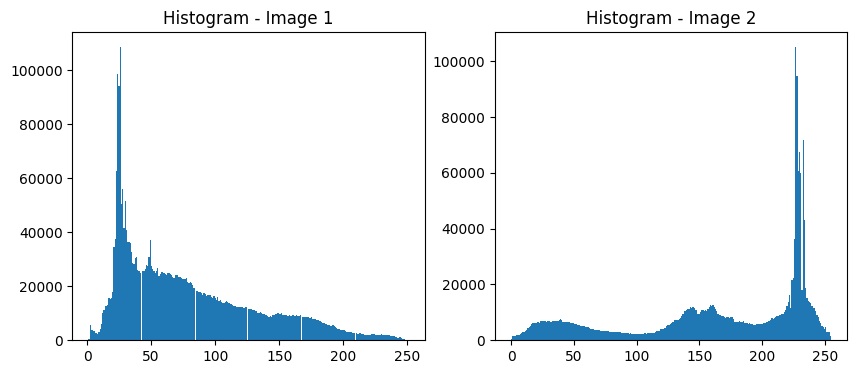

In [4]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(gray1.ravel(), bins=256)
plt.title("Histogram - Image 1")

plt.subplot(1,2,2)
plt.hist(gray2.ravel(), bins=256)
plt.title("Histogram - Image 2")

plt.show()


In [5]:
resized1 = cv2.resize(img1, (256, 256))
resized2 = cv2.resize(img2, (256, 256))


In [6]:
edges1 = cv2.Canny(gray1, threshold1=100, threshold2=200)
edges2 = cv2.Canny(gray2, threshold1=100, threshold2=200)


In [7]:
noisy1 = random_noise(gray1, mode='gaussian')
noisy1 = (255 * noisy1).astype(np.uint8)


In [8]:
denoised1 = cv2.GaussianBlur(noisy1, (5,5), 0)


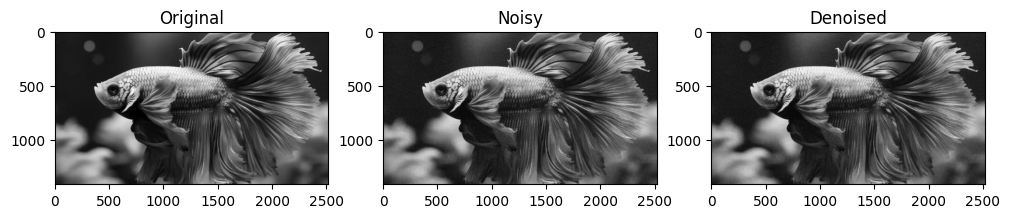

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(gray1, cmap='gray')
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(noisy1, cmap='gray')
plt.title("Noisy")

plt.subplot(1,3,3)
plt.imshow(denoised1, cmap='gray')
plt.title("Denoised")

plt.show()


# part-2

## Dataset 1: Chest X-ray Dataset (NIH)

### Source
Provided by National Institutes of Health

### Basic Information
*   **Type of imaging data**: Chest X-ray (Radiography)
*   **Number of images**: ~112,000
*   **Number of patients**: ~30,000
*   **Number of labels**: 14 disease categories

**Examples of disease labels include:**
*   Pneumonia
*   Cardiomegaly
*   Edema
*   Fibrosis
*   Atelectasis
*   Effusion

### Dataset Imbalance
The dataset is highly imbalanced:
*   The label “No Finding” dominates a large portion of the dataset.
*   Several diseases (e.g., fibrosis, hernia) have very few samples.
*   This imbalance can bias models toward predicting the majority class.

### Challenges Observed
*   **Weak labels**: Labels are automatically extracted from radiology reports, not manually annotated.
*   **Overlapping diseases**: A single X-ray image can have multiple disease labels.
*   **Varying image quality**: Differences in resolution, contrast, and acquisition conditions.
*   **High noise in lung regions**: Makes feature extraction difficult.

### Summary
The NIH Chest X-ray dataset is well-suited for multi-label classification tasks in medical imaging. However, effective use of this dataset requires:
*   Class balancing techniques
*   Robust image preprocessing
*   Careful selection of evaluation metrics (e.g., AUROC instead of accuracy)

## Dataset 2: Skin Cancer Dataset (HAM10000)

### Source
Available on Kaggle

### Basic Information
*   **Type of imaging data**: Dermoscopic skin lesion images
*   **Number of images**: ~10,000
*   **Number of classes**: 7

**Major classes include:**
*   Melanoma
*   Nevus
*   Basal cell carcinoma
*   Actinic keratosis
*   Benign keratosis
*   Vascular lesions

### Dataset Imbalance
*   Benign nevus class heavily dominates the dataset.
*   Melanoma, the most clinically important class, has significantly fewer samples.
*   This imbalance poses challenges for reliable cancer detection.

### Challenges Observed
*   **Visual similarity between classes**: Benign and malignant lesions can look very similar.
*   **Lighting and skin-tone variation**: Affects color-based features.
*   **Small lesion size**: Makes boundary detection difficult.
*   **Annotation uncertainty**: Some labels are difficult even for experts.

### Summary
The HAM10000 dataset is widely used for skin cancer detection and classification tasks.
To achieve good performance, models typically require:
*   Data augmentation to reduce overfitting
*   Color normalization techniques
*   Advanced CNN architectures such as ResNet or EfficientNet